In [1]:
pip install pandas matplotlib wordcloud nltk scikit-learnimport pandas as pd

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 325.1 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/301.2 kB 491.5 kB/s eta 0:00:01
   ----------------------------------- ---- 266.2/301.2 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.4 MB/s eta 0:00:00


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
import nltk


nltk.download("vader_lexicon")

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\abhii\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [25]:
file_path = r"C:\Users\abhii\OneDrive\Desktop\Sample_data.csv"  # dataset path
data = pd.read_csv(file_path)


data.head()

,id,text
0,1,I love programming in Python!
1,2,Streamlit makes it easy to create web apps.
2,3,I dislike debugging errors in code.
3,4,Machine learning is fascinating.
4,5,Data visualization is very important in analyt...


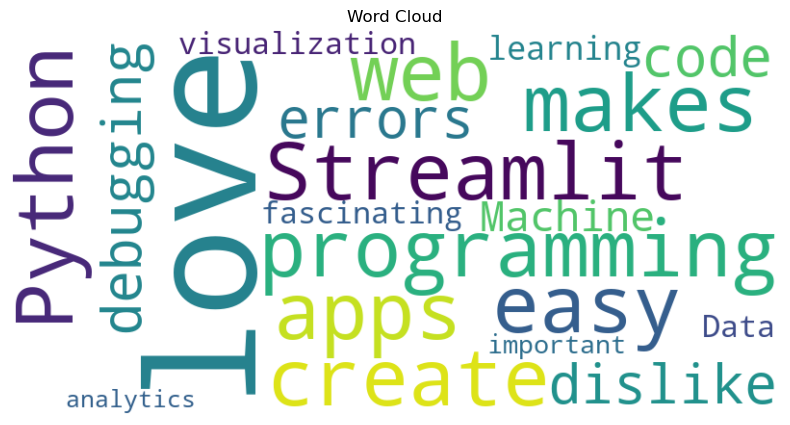

In [27]:
text_data = data['text'].dropna().astype(str).tolist()
text_string = " ".join(text_data)

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_string)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud")
plt.show()

In [29]:
data['sentiments'] = data['text'].apply(lambda x: sia.polarity_scores(x))
data[['neg', 'neu', 'pos', 'compound']] = data['sentiments'].apply(pd.Series)


data[['text', 'neg', 'neu', 'pos', 'compound']]

,text,neg,neu,pos,compound
0,I love programming in Python!,0.000,0.400,0.600,0.6696
1,Streamlit makes it easy to create web apps.,0.000,0.545,0.455,0.6124
2,I dislike debugging errors in code.,0.625,0.375,0.000,-0.6124
3,Machine learning is fascinating.,0.000,0.462,0.538,0.5423
4,Data visualization is very important in analyt...,0.000,0.741,0.259,0.2716


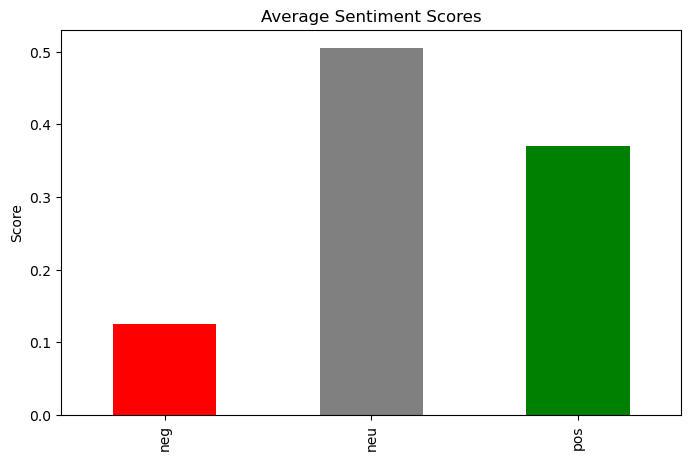

In [31]:
avg_sentiments = data[['neg', 'neu', 'pos']].mean()

avg_sentiments.plot(kind='bar', color=['red', 'gray', 'green'], figsize=(8, 5))
plt.title("Average Sentiment Scores")
plt.ylabel("Score")
plt.show()

In [33]:
all_words = " ".join(text_data).split()
word_counts = Counter(all_words)

common_keywords = word_counts.most_common(10)
common_keywords_df = pd.DataFrame(common_keywords, columns=['Keyword', 'Frequency'])

common_keywords_df

,Keyword,Frequency
0,in,3
1,I,2
2,is,2
3,love,1
4,programming,1
5,Python!,1
6,Streamlit,1
7,makes,1
8,it,1
9,easy,1


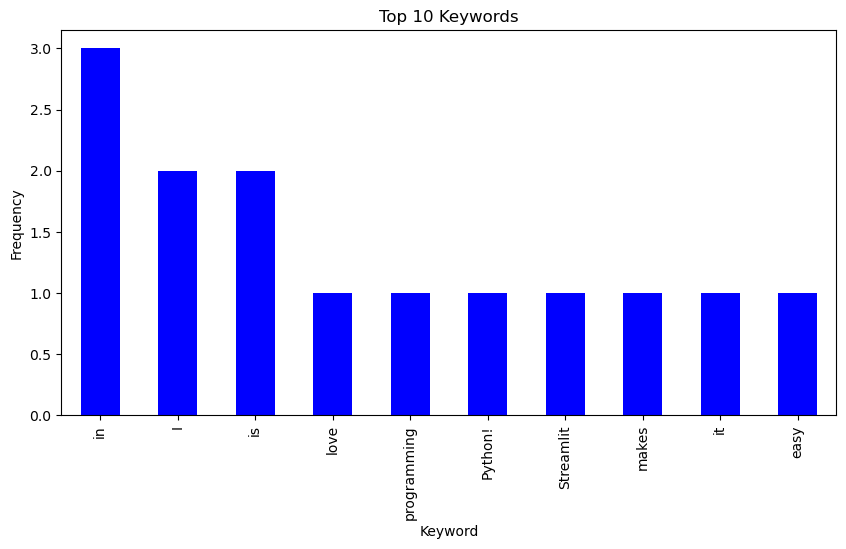

In [35]:
common_keywords_df.plot(
    x='Keyword', y='Frequency', kind='bar', color='blue', figsize=(10, 5), legend=False
)
plt.title("Top 10 Keywords")
plt.ylabel("Frequency")
plt.show()

In [1]:
pip install streamlit as st


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: streamlit in c:\users\abhii\appdata\local\programs\python\python312\lib\site-packages (1.40.2)



ERROR: Could not find a version that satisfies the requirement as (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for as
